# `DSML Workshop 05` - Hands on Data Science with real-world geotagged data

In this lecture we dive into an excerpt of Car2Go data from the city of Stuttgart (STR). We will work hands-on with the dataset. At the end of this session you should:

- Understand the dataset and be able to query, analyze and plot it
- Do basic geographical plots in folium
- Understand the business case behind Virtual Power Plants and how they interact with the ancillary services markets
- Understand the prediction and operational challenges behind operating EV-based VPPs and discuss some of the possible approaches behind tackling these challenges.

## `Data exploration`

### 1.1. General overview and data understanding

To keep size manageable we have uploaded a 2-week data snippet of Car2Go movement data from the city of Stuttgart (STR). We use data from November, 2017. In the interest of time we have done a lot of the pre-processing for you. Simply execute the code below to read in the data in the desired format.

In [102]:
# import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries 
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import timeit

In [103]:
STR_Nov = pd.read_csv("Car2Go_STR_SampleData.csv", encoding = "ISO-8859-1")
STR_Nov.sort_values(["car ID","timestamp"], inplace=True)
STR_Nov.set_index(pd.DatetimeIndex(STR_Nov["timestamp"]),inplace=True)
STR_Nov.drop("timestamp", axis=1, inplace=True)

In [104]:
STR_Nov.head()

,car ID,long,lat,address,tank/charge level,charging
timestamp,,,,,,
2017-11-01 00:10:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0
2017-11-01 00:15:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0
2017-11-01 00:20:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0
2017-11-01 00:25:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0
2017-11-01 00:30:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0


In [105]:
# Let's map time of day and day of week to our DF

def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

For this we will be using `lambda` in compination with `.apply()`a very powerful combination for row-wise operations which allows you to apply any  self-defined function to an element in a df.

In [106]:
STR_Nov.reset_index(inplace=True)
STR_Nov["Date"]=STR_Nov["timestamp"].apply(lambda x: get_date (x))
STR_Nov["Weekday"]=STR_Nov["timestamp"].apply(lambda x: get_weekday (x))
STR_Nov["Hour"]=STR_Nov["timestamp"].apply(lambda x: get_hour (x))

In [107]:
STR_Nov.head(5)

,timestamp,car ID,long,lat,address,tank/charge level,charging,Date,Weekday,Hour
0,2017-11-01 00:10:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0
1,2017-11-01 00:15:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0
2,2017-11-01 00:20:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0
3,2017-11-01 00:25:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0
4,2017-11-01 00:30:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0


### Task: What do you observe? <br>

- Play around with the above dataframe trying using commands such as `df.head()`, `df.describe()` or `df.info()`
- What data is gathered, for what period, in what format and at which frequency?
- How do you explain the sudden jumps in the time-stamp?
- What can you infer about the status of each car?

In [108]:
### YOUR CODE HERE









,timestamp,car ID,long,lat,address,tank/charge level,charging,Date,Weekday,Hour
1393190,2017-11-14 21:25:01,WME4513901K820650,9.19121,48.68895,Parkplatz Flughafen Stuttgart,39,0,2017-11-14,1,21
1393191,2017-11-14 21:30:01,WME4513901K820650,9.19121,48.68895,Parkplatz Flughafen Stuttgart,39,0,2017-11-14,1,21
1393192,2017-11-14 21:35:01,WME4513901K820650,9.19121,48.68895,Parkplatz Flughafen Stuttgart,39,0,2017-11-14,1,21
1393193,2017-11-14 21:40:01,WME4513901K820650,9.19121,48.68895,Parkplatz Flughafen Stuttgart,39,0,2017-11-14,1,21
1393194,2017-11-14 21:45:01,WME4513901K820650,9.19121,48.68895,Parkplatz Flughafen Stuttgart,39,0,2017-11-14,1,21


### 1.1.1 Fleet Size and availability

In [109]:
# Let's explore fleet size

fleet_size = len(STR_Nov["car ID"].unique())

print("The STR fleet consists of {} cars (for the observed time frame)".format(fleet_size))

The STR fleet consists of 489 cars (for the observed time frame)


Note that in STR the full active car fleet is electric and therefore constitutes a potential distributed energy resource (DER) that can be used to provide flexibility. The fleet consist of Smart EQ fortwos and Mercedes Benz A Class models each with a battery of size 17.6 kWh and charging rates of 4.6 kW (22kW optional).

Let's explore fleet availability throughout the week and day by checking how many unique cars are available for each day and hour of day.

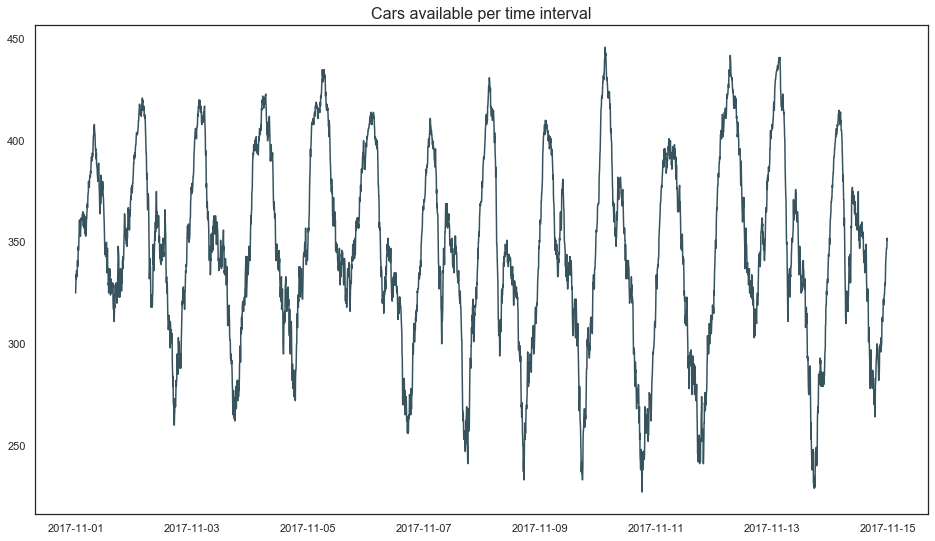

In [110]:
# Availability over time (5 min intervals)

STR_Nov_Date_avail = STR_Nov.groupby("timestamp")["car ID"].nunique() # this counts unique vehicles per 5-min time interval

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(STR_Nov_Date_avail)
ax.set_title("Cars available per time interval",fontsize=16)

plt.show()

Next we perform some aggregations. We are interested in typical availability
- By day of week
- By hour

In [111]:
# Availability by day of week (0 = Monday, 6 = Sunday)

STR_Nov_weekday_avail = STR_Nov.groupby(["Date","Weekday"])["car ID"].nunique()
STR_Nov_weekday_avail = pd.DataFrame(STR_Nov_weekday_avail)

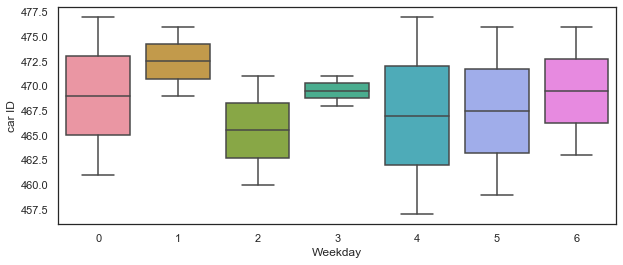

In [112]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=STR_Nov_weekday_avail.index.get_level_values(1), y=STR_Nov_weekday_avail["car ID"],ax=ax)
plt.show()

In [113]:
# Availability by time of day

STR_Nov_time_avail = STR_Nov.groupby(["Date","Hour"])["car ID"].nunique()
STR_Nov_time_avail = pd.DataFrame(STR_Nov_time_avail)

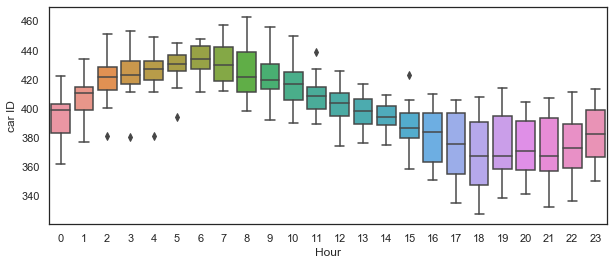

In [114]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=STR_Nov_time_avail.index.get_level_values(1), y=STR_Nov_time_avail["car ID"],ax=ax)
plt.show()

### Task: What do you observe? <br>

- Describe the patterns of car availability shown in the descriptive graphs above. Which graphs are particularly instructive?
- What are your assumptions regarding the cause of the observed patterns?
- How would you expect the plot to look like if we were to plot the number of trips started?

### 1.1.2 Car Movement & Location Intelligence

How can we infer car movement from this data? Let's have a look at what the data provides. A lot of what follows below is a demonstation of possible geospatial analytics tasks with limited implications for VPP operations. It is, however, highly relevant from a fleet operator point of view (Where is the demand? Where should my units be when?)

**Technical note**: for this tutorial we use `folium` for visualization (see [here](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data) for a quick introduction). For more comprehensive functionality `geopandas` offers a powerful Python GIS data handling and plotting library (see [here](http://geopandas.org)).

In [115]:
STR_Nov["Coordinates"] = list(zip(STR_Nov["lat"].round(4),STR_Nov["long"].round(4)))

In [116]:
STR_Nov.head()

,timestamp,car ID,long,lat,address,tank/charge level,charging,Date,Weekday,Hour,Coordinates
0,2017-11-01 00:10:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
1,2017-11-01 00:15:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
2,2017-11-01 00:20:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
3,2017-11-01 00:25:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
4,2017-11-01 00:30:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"


Let us check where cars are typically located by plotting a heat map of locations for a given hour of the day.

In [117]:
# For performance reasons we select a single car only - Pick randomly from the list
car_list = STR_Nov["car ID"].unique()
selected_car_ID = random.choice(car_list)
print(selected_car_ID)

WME4513901K698178


In [118]:
#define new map

STR_heat_map = folium.Map(location=(48.76507, 9.25371),  tiles='Stamen Toner', 
                       zoom_start=9, control_scale=True, max_zoom=20)

# add heat map

STR_heat_map.add_child(plugins.HeatMap(STR_Nov[STR_Nov["car ID"]==selected_car_ID]["Coordinates"], radius=20))
STR_heat_map

We now whish to identify the movement of the selected car. We draw the location points and trajectories.

In [119]:
#define empty map

STR_map_points = folium.Map(location=(48.76507, 9.25371),  tiles='Stamen Toner', 
                       zoom_start=9, control_scale=True, max_zoom=20)


# draw positions for selcted cars

STR_Nov_car_select = STR_Nov[STR_Nov["car ID"]==selected_car_ID]

positions = list(STR_Nov_car_select["Coordinates"].unique())
for position in positions:
    folium.CircleMarker(radius=5, location=position, popup='The Waterfront', 
                                 color='crimson', fill_color='crimson').add_to(STR_map_points)
    
STR_map_points

We also add the trajectories to get an understanding of the distance traveled. Do you see any problem with such an approach?

In [120]:
STR_map_trajectory = folium.Map(location=(48.76507, 9.25371),  tiles='Stamen Toner', 
                       zoom_start=9, control_scale=True, max_zoom=20)

# draw trajectory for a selected car

folium.PolyLine(STR_Nov_car_select["Coordinates"],color="blue", weight=5, opacity=0.8, ).add_to(STR_map_trajectory)
STR_map_trajectory

### Task

- Combine the three maps into one by defining a new map and adding all three layers to that map. How does it look?

In [121]:
# Your Code Here

# define empty map



# add heatmap



# add positions



# add trajectories



# plot map




**Note**: from the data we can also infer where charging points must be located. Let's have a look...

### Task

- How would you identify charging positions?

In [122]:
STR_Nov.head()

,timestamp,car ID,long,lat,address,tank/charge level,charging,Date,Weekday,Hour,Coordinates
0,2017-11-01 00:10:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
1,2017-11-01 00:15:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
2,2017-11-01 00:20:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
3,2017-11-01 00:25:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"
4,2017-11-01 00:30:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)"


In [123]:
# how identify charging station locations?

len(list(STR_Nov[STR_Nov["charging"]==1]["Coordinates"].unique()))


355

In [124]:
# YOUR CODE BELOW

# define dataset for plotting, i.e. charging_pos



#define empty map



# draw charge points positions




### Task & Discussion: Limitations and how to deal with them?

- Play around with the map above and try for different vehicles by repeatedly executing the code - What do you observe?
- What are the key limitations of this data granularity?
- What are approaches to infering distance traveled?
- What are apporaches to infering the exact route traveled?

## 1.2. Focus: Capacity Availability

We now wish to understand how much capacity we have available at any given point in time and can therefore use to trade in the acillary market. For this we first need to define how many cars are charging at a particular instance. Also remeber the following technical information regarding the fleet:

- Battery capacity: 17.6 kWh
- Charging rate: 4.6 kW
- Optional fast charging: 22 kW

### 1.2.1. Capacity for trading in the ancillary services market

In [125]:
Battery_energy_capa = 17.6 #kWh
Charging_rate = 6 #kW
Charging_rate_fast = 22 #kW
Max_EV_range = 200 #km

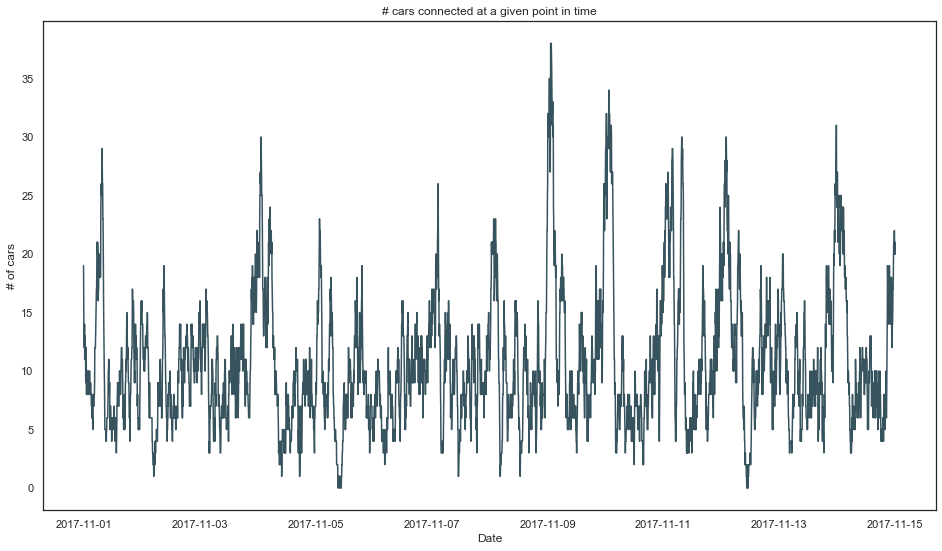

In [126]:
# Cars connected at a given point in time (we can simply sum the charging dummies)
STR_Nov_charging = STR_Nov.groupby("timestamp")["charging"].sum()

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(STR_Nov_charging)

ax.set_title("# cars connected at a given point in time")
ax.set_ylabel("# of cars")
ax.set_xlabel("Date")

plt.show()

In [127]:
# Let us look at trends over the day - How many cars get connected per hour per time of day?

STR_Nov_charging_tod = pd.DataFrame(STR_Nov[STR_Nov["charging"]==1]).groupby(["Date","Hour"])["car ID"].nunique()
STR_Nov_charging_tod = pd.DataFrame(STR_Nov_charging_tod)

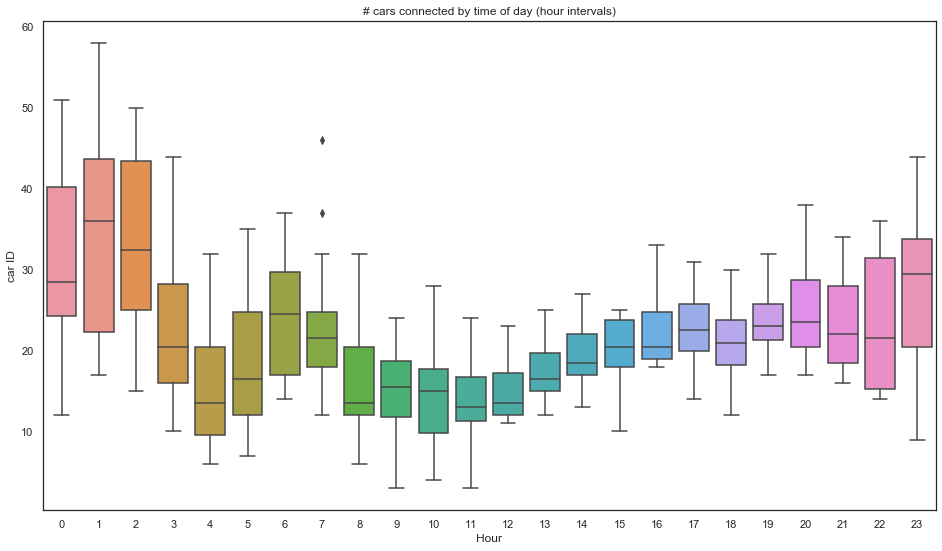

In [128]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=STR_Nov_charging_tod.index.get_level_values(1), y=STR_Nov_charging_tod["car ID"],ax=ax)
ax.set_title("# cars connected by time of day (hour intervals)")
plt.show()

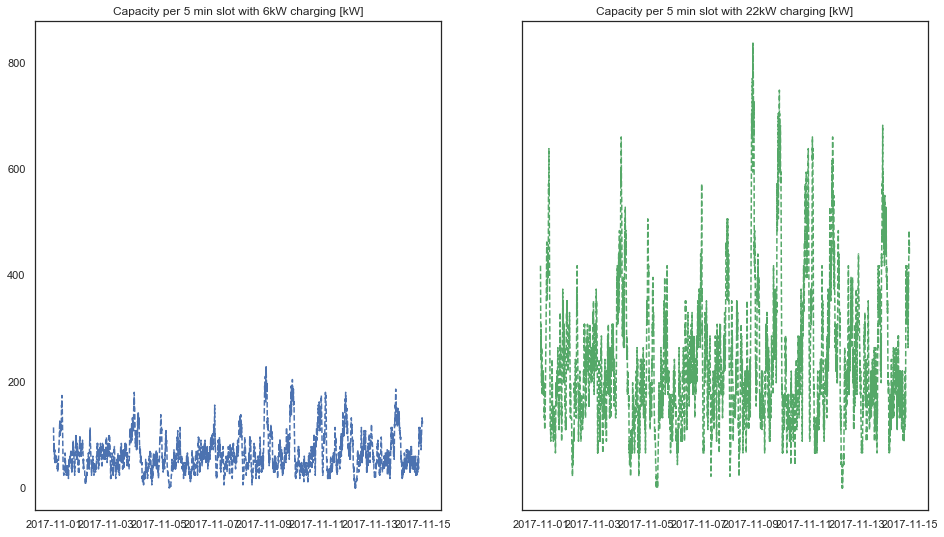

In [129]:
fig, ax = plt.subplots(figsize=(16,9), ncols=2, nrows=1, sharex=True, sharey=True)


STR_Nov_capa_normal = STR_Nov.groupby("timestamp")["charging"].sum()*Charging_rate
STR_Nov_capa_fast = STR_Nov.groupby("timestamp")["charging"].sum()*Charging_rate_fast

# Normal speed______

ax[0].set_title("Capacity per 5 min slot with 6kW charging [kW]")
ax[0].plot(STR_Nov_capa_normal, "--b")

# fast speed_______

ax[1].set_title("Capacity per 5 min slot with 22kW charging [kW]")
ax[1].plot(STR_Nov_capa_fast, "--g")

plt.show()

### Task:

- What patterns do you see? Why? Do you see scope for building a strong predictive model?
- How do you evaluate the case of using the VPP in the ancillary services markets (secondary reserve) (compare fast charging and normal charging case)? Given current market designs, can an EV VPP be successful?
- Is there scope for raising capacity at a given point in time? What are innovative apporaches towards raising available capacity at any given point in time? (compare against # of idle cars, charging station positions etc.)
- Recall the mechanism of the secondary reserve market: Participants use bid for a capacity price for every 15min. Do you see any issues/constraints in using electric vehicle batteries as secondary reserve? How can the fleet operator ensure that the VPP can deliver the required capacity over the full pledged period?

### 1.2.2 What is the battery constraint for balancing capacity provision?

In the acillary services market you pledge capacity (in kW) for which you get reimbursed. If you get called (either for upwards or downwards regulation) you need to feed in or consume at this rate (or below). Therefore, as a plant operator, you need to demonstrate that you will be able to sustain the pleadged load for the full 15min time interval.

To verify, we explore the state of charge across time for the cars that are charging as this will give us an indication for the energy that is available for upwards and downwards regulation (i.e. the time frame for which the VPP can be called) - An important constraint!

In [130]:
# connected battery capacity (in KWh)

# What do we have available for downwards regulation (i.e. how much energy can be absorbed?)
STR_Nov["Connected free Battery Capacity [kWh]"] = (
    (100-STR_Nov["tank/charge level"])/100)*Battery_energy_capa*STR_Nov["charging"]

# What do we have available for upwards regulation (i.e. how much energy can be fed back into the grid?)
STR_Nov["Connected SOC [kWh]"] = (
    (STR_Nov["tank/charge level"])/100)*Battery_energy_capa*STR_Nov["charging"]

In [131]:
Connected_downwards_energy = STR_Nov[STR_Nov["charging"]==1].groupby("timestamp")["Connected free Battery Capacity [kWh]"].sum()
Connected_upwards_energy = STR_Nov[STR_Nov["charging"]==1].groupby("timestamp")["Connected SOC [kWh]"].sum()

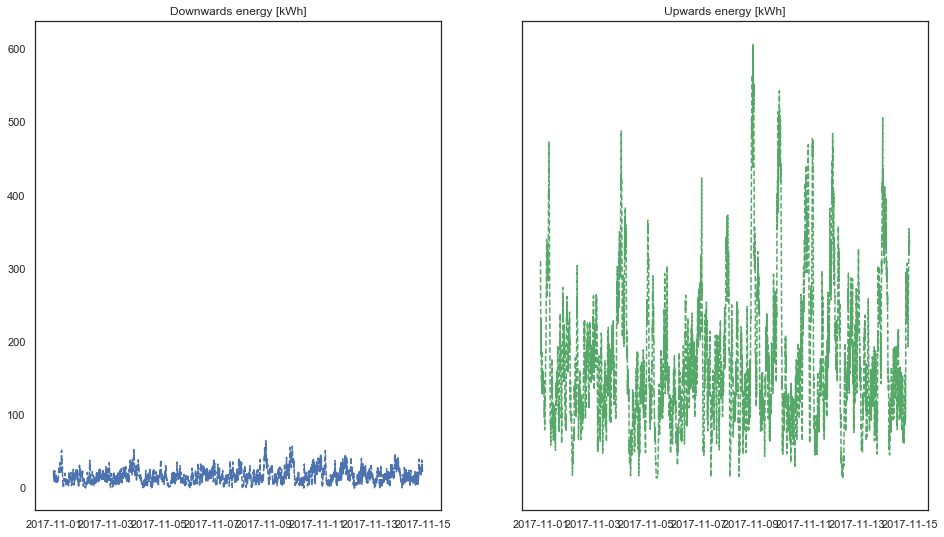

In [132]:
fig, ax = plt.subplots(figsize=(16,9), ncols=2, nrows=1, sharex=True, sharey=True)

# Normal speed______

ax[0].set_title("Downwards energy [kWh]")
ax[0].plot(Connected_downwards_energy, "--b")

# fast speed_______

ax[1].set_title("Upwards energy [kWh]")
ax[1].plot(Connected_upwards_energy, "--g")

plt.show()

### Task:

- How do you determine whether enough energy/storage capacity is available to fulfill the 
- From inspecting the graph above and comparing with the available capacity from above is their a relevant state of charge constraint? Is it a problem? How big of a problem is it?
- How does this constraint influence the capacity that can be pledged in the capacity markets?

## 1.3. Focus: Rental demand and vehicle utilization

We now whish to understand in more detail the rental demand in Stuttgart. First we need a full understanding of car status for the different years. We distinguish the following four states:

+ **parked, not charging**: charging = 0, $address_{(t-1)}$ = $address_t$
+ **parked, charging**: charging = 1, $address_{(t-1)}$ = $address_t$
+ **rented (start)**: charging = 0, $address_{(t-1)}$ = $address_t$, $address_{(t-1)}$ <> $address_t$
+ **rented (end)**: charging = 0, $address_{(t-1)}$ <> $address_t, address_{(t-1)}$ = $address_t$

In [134]:
STR_Nov.columns

Index(['timestamp', 'car ID', 'long', 'lat', 'address', 'tank/charge level',
       'charging', 'Date', 'Weekday', 'Hour', 'Coordinates',
       'Connected free Battery Capacity [kWh]', 'Connected SOC [kWh]'],
      dtype='object')

In [135]:
#columns = ["carID", "long","lat", "address", "soc", "charging", "date", "week", "hour", "coordinates", "connected free capacity", "connected soc", "timestamp"]
columns = ['timestamp', 'carID', 'long', 'lat', 'address', 'soc','charging', 'date', 'weekday', 'hour', 'coordinates','connected free capacity', 'connected soc']
STR_Nov.columns = columns
STR_Nov.head(2)

,timestamp,carID,long,lat,address,soc,charging,date,weekday,hour,coordinates,connected free capacity,connected soc
0,2017-11-01 00:10:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)",0.0,0.0
1,2017-11-01 00:15:01,WDD2428901J014865,9.25371,48.76507,"Heiligenwiesen 31, 70327 Stuttgart",55,0,2017-11-01,2,0,"(48.7651, 9.2537)",0.0,0.0


In [136]:
def calculate_trips(df_car):
    
    trips = list()
    
    prev = df_car.iloc[0]
    
    # iterate over rows
    for row in df_car.itertuples():
        
        

        
    # 0=carid, 1=long, 2=lat, 3=address, 4=Soc, 12=timestamp
        if row.address != prev.address:
            trips.append([prev.carID, 
                          prev.timestamp, 
                          prev.address, 
                          prev.lat, 
                          prev.long, 
                          prev.soc, 
                          row.timestamp,
                          row.address, 
                          row.lat, 
                          row.long, 
                          row.soc])
        prev = row # set prev to row (will be r-1 for next iteration)

    return pd.DataFrame(
        trips,
        columns=[
            "EV",
            "start_time",
            "start_address",
            "start_lat",
            "start_lon",
            "start_soc",
            "end_time",
            "end_address",
            "end_lat",
            "end_lon",
            "end_soc"],
    )

In [137]:
# Define processing function for cleaning

def process(df):
    """Executes all preprocessing steps sequentially"""

    # GPS accuracy is only guaranteed at a granularity of 10m, round accordingly.
    # See also: https://wiki.openstreetmap.org/wiki/Precision_of_coordinates.
    df[["lat", "long"]] = df[
        ["lat", "long"]].round(4)
    

    df.sort_values(["carID","timestamp"], inplace=True)

    # define lists
    trips = list()
    cars = df["carID"].unique()
    
    # loop
    for car in cars:
        ev_trips = calculate_trips(df[df["carID"] == car])
        trips.append(ev_trips)

    df_trips = pd.concat(trips)
    df_trips = df_trips.sort_values("start_time").reset_index().drop("index", axis=1)

    #df_trips = clean_trips(df_trips)
    #df_trips = add_charging_stations(df_trips, df_stations)
    
    
    return df_trips

In [138]:
STR_Nov_trips = process(STR_Nov)

In [139]:
# To do: Do some cleaning, e.g. remove v. long trips

In [140]:
STR_Nov_trips.head()

,EV,start_time,start_address,start_lat,start_lon,start_soc,end_time,end_address,end_lat,end_lon,end_soc
0,WME4513901K705747,2017-11-01 00:00:01,"ProbststraÃe 37, 70567 Stuttgart",48.7313,9.1485,100,2017-11-01 00:10:01,"GlashÃ¼tter Weg 10, 70567 Stuttgart",48.7264,9.1563,99
1,WME4513901K672962,2017-11-01 00:00:01,"WolframstraÃe 74, 70191 Stuttgart",48.7935,9.1797,78,2017-11-01 00:20:01,"BismarckstraÃe 34, 70197 Stuttgart",48.7733,9.1553,72
2,WME4513901K649089,2017-11-01 00:05:01,"SickstraÃe 41, 70190 Stuttgart",48.7906,9.2046,67,2017-11-01 00:35:01,"AdlerstraÃe 24, 70199 Stuttgart",48.7633,9.1635,54
3,WME4513901K649304,2017-11-01 00:05:01,"OssietzkystraÃe 6-8, 70174 Stuttgart",48.7848,9.1771,84,2017-11-01 00:35:01,"Ulmer Str. 339, 70327 Stuttgart",48.7729,9.2426,76
4,WME4513901K662402,2017-11-01 00:05:01,"UrbanstraÃe 8, 73728 Esslingen",48.7412,9.3131,100,2017-11-01 00:20:01,"Rosselenweg 1-13, 73730 Esslingen am Neckar",48.7291,9.3427,94


In [141]:
# Add distance

# Approach 1: Infer using Soc, Problem: Cannot use this approach in case car has been charged during trip

def distance(soc_diff):
    if soc_diff<=0:
        dist = -soc_diff/100 * Max_EV_range
        return dist
    else:
        return np.nan # if EV has been charged during
    
# Approach 2: Use Haversine distance to find geodesic distance (see: https://janakiev.com/blog/gps-points-distance-python/)
### Not implemented here

# Approach 3: OpenStreetMaps Route Calc (OSMnx is an excellent library for this)
### Not implemented here

### Here we use Approach 1
STR_Nov_trips["distance_soc"] = (STR_Nov_trips["end_soc"]-STR_Nov_trips["start_soc"]).apply(distance)


In [142]:
# Add trip duration
# Max. overerstimation of duration by c. 10 min 
# (rent just before next 5min stamp and return just after second to last stamp) )

STR_Nov_trips["duration"] = STR_Nov_trips["end_time"] - STR_Nov_trips["start_time"]

In [143]:
STR_Nov_trips.head()

,EV,start_time,start_address,start_lat,start_lon,start_soc,end_time,end_address,end_lat,end_lon,end_soc,distance_soc,duration
0,WME4513901K705747,2017-11-01 00:00:01,"ProbststraÃe 37, 70567 Stuttgart",48.7313,9.1485,100,2017-11-01 00:10:01,"GlashÃ¼tter Weg 10, 70567 Stuttgart",48.7264,9.1563,99,2.0,00:10:00
1,WME4513901K672962,2017-11-01 00:00:01,"WolframstraÃe 74, 70191 Stuttgart",48.7935,9.1797,78,2017-11-01 00:20:01,"BismarckstraÃe 34, 70197 Stuttgart",48.7733,9.1553,72,12.0,00:20:00
2,WME4513901K649089,2017-11-01 00:05:01,"SickstraÃe 41, 70190 Stuttgart",48.7906,9.2046,67,2017-11-01 00:35:01,"AdlerstraÃe 24, 70199 Stuttgart",48.7633,9.1635,54,26.0,00:30:00
3,WME4513901K649304,2017-11-01 00:05:01,"OssietzkystraÃe 6-8, 70174 Stuttgart",48.7848,9.1771,84,2017-11-01 00:35:01,"Ulmer Str. 339, 70327 Stuttgart",48.7729,9.2426,76,16.0,00:30:00
4,WME4513901K662402,2017-11-01 00:05:01,"UrbanstraÃe 8, 73728 Esslingen",48.7412,9.3131,100,2017-11-01 00:20:01,"Rosselenweg 1-13, 73730 Esslingen am Neckar",48.7291,9.3427,94,12.0,00:15:00


In [144]:
# Check occurences where distance metric fails 
# -> No way of infering actual distance traveled as it will likely have been a roundtrip

STR_Nov_trips[STR_Nov_trips["distance_soc"].isna() == True].head()

,EV,start_time,start_address,start_lat,start_lon,start_soc,end_time,end_address,end_lat,end_lon,end_soc,distance_soc,duration
6,WME4513901K820553,2017-11-01 00:10:01,"ZeppelinstraÃe 81, 70193 Stuttgart",48.7788,9.1480,99,2017-11-01 00:30:01,"OssietzkystraÃe 4-6, 70174 Stuttgart",48.7847,9.1773,100,NaN,00:20:00
10,WME4513901K658009,2017-11-01 00:15:01,"Kernerplatz 9, Stuttgart",48.7839,9.1900,80,2017-11-01 01:00:01,"RotebÃ¼hlstraÃe 120, 70197 Stuttgart",48.7701,9.1558,84,NaN,00:45:00
28,WME4513901K667330,2017-11-01 00:30:01,"KronprinzstraÃe 24, 70173 Stuttgart",48.7757,9.1745,32,2017-11-01 07:10:01,MÃ¶hringer StraÃe 47(hinter MatthÃ¤us-Kirche)...,48.7623,9.1617,81,NaN,06:40:00
43,WME4513901K650564,2017-11-01 00:55:02,"JohannesstraÃe 53, 70176 Stuttgart",48.7788,9.1604,85,2017-11-01 01:15:02,"MozartstraÃe 37, 70180 Stuttgart",48.7677,9.1766,86,NaN,00:20:00
44,WME4513901K672394,2017-11-01 00:55:02,"BolzstraÃe 7, 70173 Stuttgart",48.7801,9.1775,46,2017-11-01 03:35:01,"Mahatma-Gandhi-Str.3,70376 Stgt./Ecke Auerbach...",48.8180,9.1914,80,NaN,02:39:59


In [145]:
STR_Nov_trips_total_rental = STR_Nov_trips[["EV","duration"]].groupby("EV").sum()

In [146]:
STR_Nov_trips_total_rental["utilization"] = STR_Nov_trips_total_rental["duration"]/ (np.timedelta64(15,'D'))

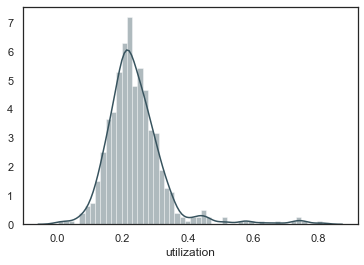

In [148]:
sns.distplot(STR_Nov_trips_total_rental["utilization"], bins=50)
plt.show()

## Tasks

- What patterns do you observe in rental demand and utilization?
- What is the issue with the above view on rental demand? How best to deal with it?
- How do you evaluate the capacity utilization of the cars? Does the sharing economy deliver on its promise of higher capital utilization?
- How would you go about forecasting rental demand? What key factors can you think of that could be used in a predictive model to forecast rental demand?